In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
N = 500
s = 100
theta = 1

In [3]:
def sample_mean(X, k):
    y = 0
    for xi in X:
        y += np.power(xi, k)
    return y / N

def generate_uniform_distribution():
    return np.random.uniform(0, theta, N)
    
def generate_exp_distribution():
    return np.random.exponential(theta, N)

def estimated_theta_uniform(X, k):
    return np.power((k + 1) * sample_mean(X, k), 1 / k)

def estimated_theta_exp(X, k):
    return np.power(sample_mean(X, k) / np.math.factorial(k), 1 / k)

def mse(k, estimated_theta, generate_distribution):
    apprx_theta = []
    thlist = [theta] * s
    for _ in range(0, s):
        apprx_theta.append(estimated_theta(generate_distribution(), k))
    return mean_squared_error(apprx_theta, thlist)

def draw_plot(func, gen):
    klist = [i for i in range(1, 100)]
    y = [mse(k, func, gen) for k in klist]

    plt.figure(figsize=(10, 6))
    plt.plot(klist, y)
    plt.xlabel('k')
    plt.ylabel('mean squred error')
    plt.show()
        

## Uniform Distribution 

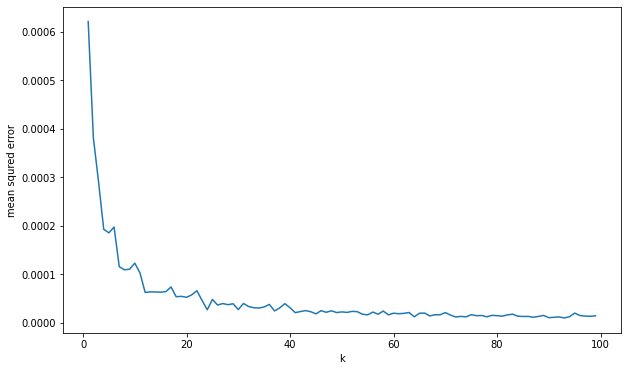

In [4]:
draw_plot(estimated_theta_uniform, generate_uniform_distribution)

## Exponential distribution

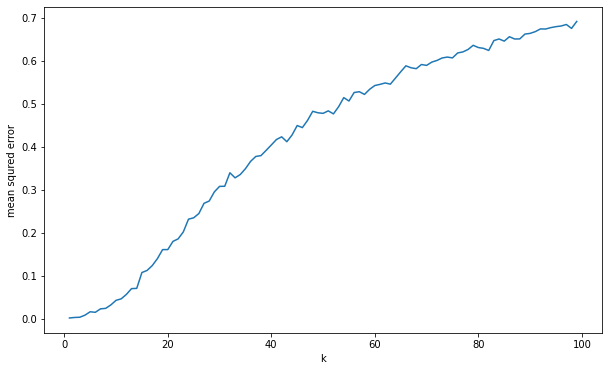

In [5]:
draw_plot(estimated_theta_exp, generate_exp_distribution)